## Import Libraries

In [1]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
## Load and Explore the Dataset

# Load the dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target

# Display the first few rows
print(california_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mea

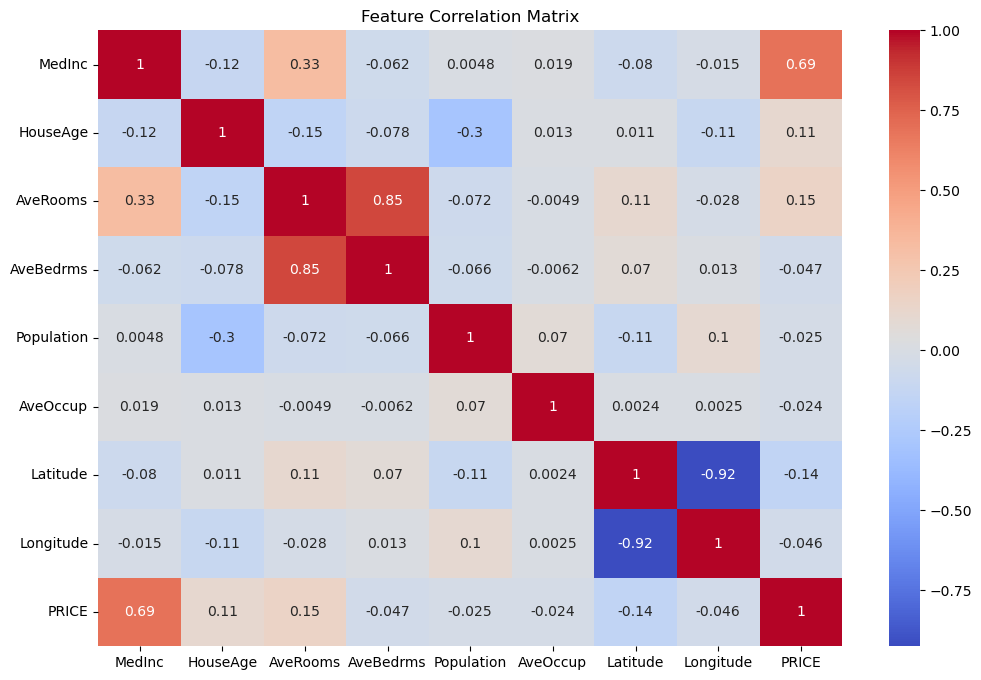

C:\Users\biost\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


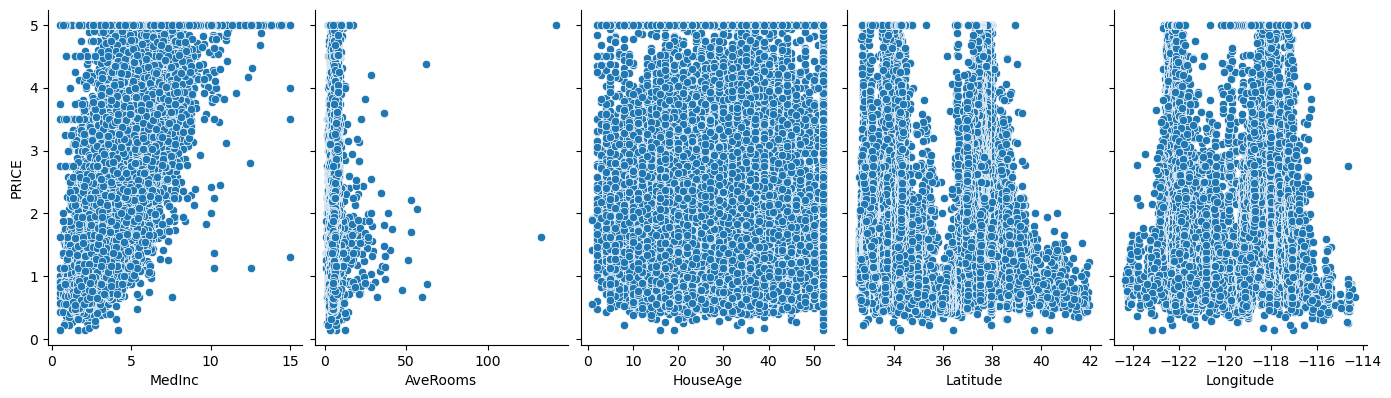

In [3]:
## Data Preprocessing

# Check for missing values
print(california_df.isnull().sum())

# Data summary
print(california_df.describe())

# Correlation matrix
corr_matrix = california_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Visualize relationships between key features and target
sns.pairplot(california_df, x_vars=['MedInc', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude'], y_vars='PRICE', height=4, aspect=0.7)
plt.show()

In [4]:
## Feature Engineering
# Binning HouseAge into categories
california_df['HouseAgeGroup'] = pd.cut(california_df['HouseAge'], bins=[0, 10, 30, 52], labels=['New', 'Mid', 'Old'])

# Log-transform skewed features
california_df['Population_log'] = np.log1p(california_df['Population'])

In [5]:
## Split the Data into Training and Testing Sets

X = california_df.drop(['PRICE', 'HouseAgeGroup'], axis=1)
y = california_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
## Model Training - Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
## Evaluate the Model

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

Training MSE: 0.5179211705972954
Testing MSE: 0.5556281081339667
Training R^2: 0.6125601344863334
Testing R^2: 0.575988781090431


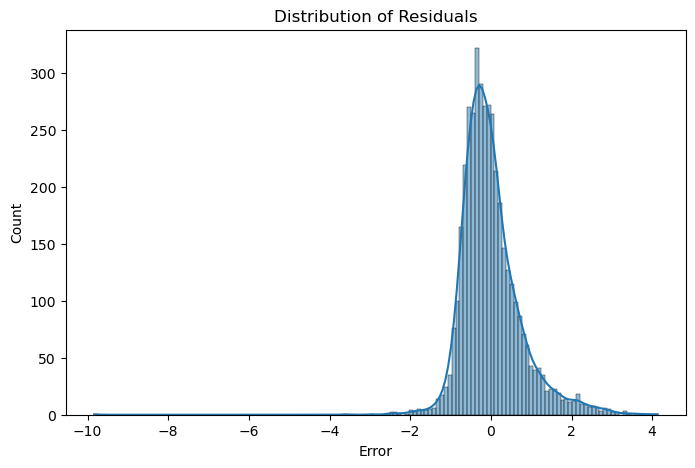

In [8]:
## Residual Analysis

residuals = y_test - y_test_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.show()

In [9]:
## Advanced Modeling - Regularized Regression
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("Ridge R2:", r2_score(y_test, ridge.predict(X_test)))
print("Lasso R2:", r2_score(y_test, lasso.predict(X_test)))

Ridge R2: 0.5760570323102765
Lasso R2: 0.5318167610318159


In [10]:
## Tree-Based Model - Random Forest

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))

Random Forest R2: 0.804048799407646


In [11]:
## Cross-Validation for Robust Evaluation

scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-validated R2 scores:", scores)
print("Average R2:", scores.mean())

Cross-validated R2 scores: [0.54861615 0.46817735 0.55092493 0.53686988 0.66043405]
Average R2: 0.5530044710727277


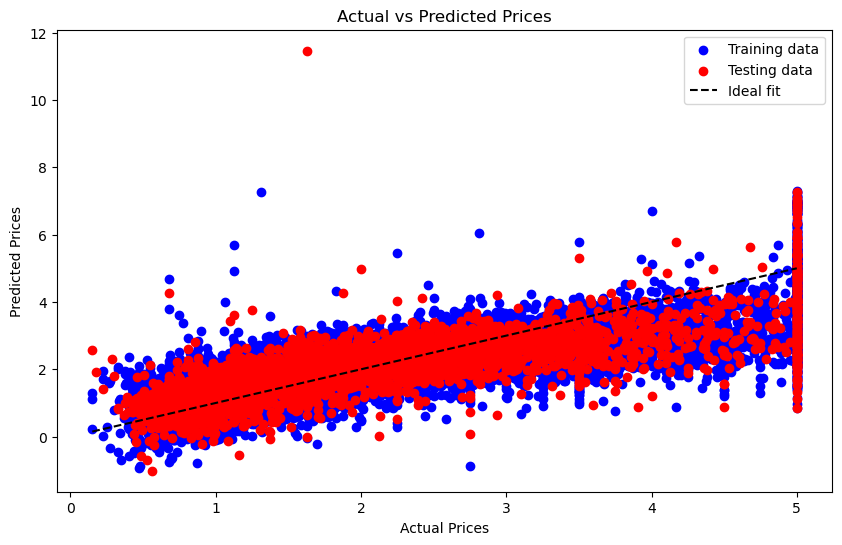

In [12]:
## Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', label='Ideal fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

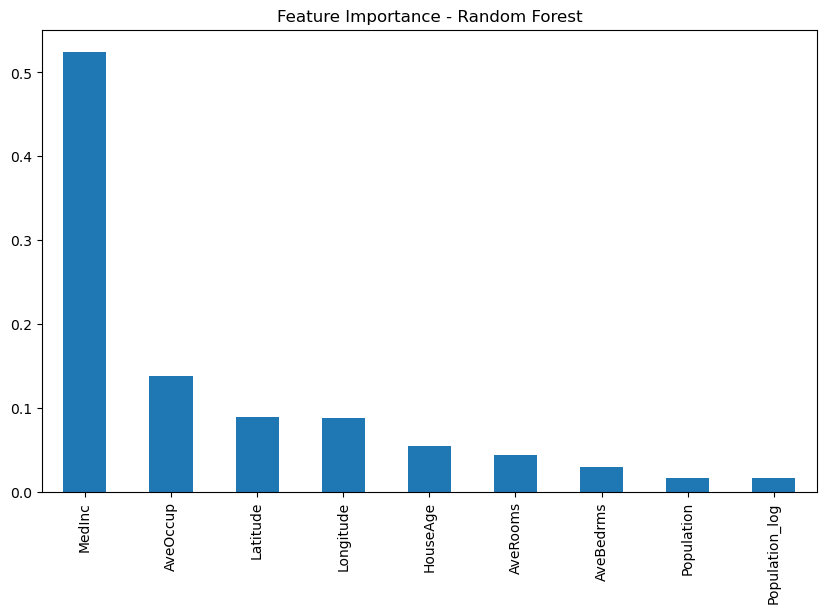

In [13]:
## Feature Importance (Random Forest)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()

In [14]:
## Save Model (Optional)
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']